In [166]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import openpyxl
import xlrd
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from nilearn.connectome import ConnectivityMeasure
from pandas import DataFrame
import scipy as sc
from scipy import io
from scipy.stats import pearsonr
from os.path import join, exists, dirname
from glob import glob
from brainspace import gradient
import nibabel as nib

# Load Data (업로드시 제외)

In [253]:
# define path
path_data = join('Z:\\', 'hschoi\\backup\hschoi\\1.asd.grad\\data')
workfolder = 'ABIDE_2'
path_work = join(path_data,workfolder)
path_ts = 'W:\\ksbyeon\\1.MIPL\\21.DNN.autism\\1.data\\Hong\\work\\prep-ABIDE-II\\MMP_tsmean\\'
path_ts_demo = 'W:\\ksbyeon\\1.MIPL\\21.DNN.autism\\1.data\\Hong\\ABIDE_fMRI'
path_mat = 'Z:\\hschoi/backup/hschoi/1.asd.grad/code/matlab_code/functional-random-forest-master/RFSD/'
atlas_path = join('Z:\\hschoi\\backup\hschoi\\template')
path_gii_data = 'Z:/hschoi/backup/hschoi/1.asd.grad/code/surface/npy2gii/data'

# Load Parameter

In [8]:
demo = pd.read_excel(join(path_data, 'abide_func_fn_abideII_sorted.xlsx'), sheet_name='Sheet1', skiprows=0)

sub_list = demo['ID']
label2 = demo['Group']
label = demo['DX_GROUP']
site_id = demo['Site']
site_label = demo['SITE_Label']
Age = demo['Age']
FD = demo['MeanFD_Jenkinson'] # = func_mean_fd
FIQ = demo['FIQ']
sex = demo['Sex']

ASD_index = np.where(label == 1)[0]                
TD_index = np.where(label == 2)[0]
Total_index = np.concatenate((ASD_index,TD_index)) 
sorted_idx = np.concatenate((ASD_index,TD_index), axis = 0)

site_label_sorted = np.array(site_label)[sorted_idx]

print('Total : ', len(label))
print('ASD : ', len(ASD_index))
print('TD : ', len(TD_index))

Total :  103
ASD :  50
TD :  53


# Compare parameter

In [11]:
import statsmodels as sm
from statsmodels.stats.multitest import multipletests

i = Age # Age

print('Mean : ', np.array(i)[ASD_index].mean(), 'Std : ', np.array(i)[ASD_index].std())
print('Mean : ', np.array(i)[TD_index].mean(), 'Std : ', np.array(i)[TD_index].std())

[s,p] = sc.stats.ttest_ind(np.array(i)[ASD_index],np.array(i)[TD_index], equal_var=False, axis=0) 

p_fdr = sm.stats.multitest.multipletests(p,alpha=0.05,method='fdr_bh')

print('')
print('t : ',s)
print("p-value")
print('0 : ', np.where(p_fdr[0]==True),'\n', np.where(p_fdr[0]==True)[0].shape)
print(p_fdr)

Mean :  13.064440000000001 Std :  6.0200123360670945
Mean :  15.315415094339622 Std :  6.341267311091337

t :  -1.8300583919188058
p-value
0 :  (array([], dtype=int64),) 
 (0,)
(array([False]), array([0.07019074]), 0.050000000000000044, 0.05)


In [13]:
# Compare Age among sites

i = Age # Age

label_index = TD_index # ASD_index TD_index Total_index

index_1 = np.intersect1d(np.where(np.array(site_id)=='TCD')[0],ASD_index) # ASD_index TD_index Total_index label_index
index_2 = np.intersect1d(np.where(np.array(site_id)=='NYU')[0],ASD_index)
index_3 = np.intersect1d(np.where(np.array(site_id)=='IP')[0],ASD_index)

index_4 = np.intersect1d(np.where(np.array(site_id)=='TCD')[0],TD_index) # ASD_index TD_index Total_index label_index
index_5 = np.intersect1d(np.where(np.array(site_id)=='NYU')[0],TD_index)
index_6 = np.intersect1d(np.where(np.array(site_id)=='IP')[0],TD_index)

print('Mean : ', np.array(i)[index_1].mean(), 'Std : ', np.array(i)[index_1].std())
print('Mean : ', np.array(i)[index_2].mean(), 'Std : ', np.array(i)[index_2].std())
print('Mean : ', np.array(i)[index_3].mean(), 'Std : ', np.array(i)[index_3].std())

print('Mean : ', np.array(i)[index_4].mean(), 'Std : ', np.array(i)[index_4].std())
print('Mean : ', np.array(i)[index_5].mean(), 'Std : ', np.array(i)[index_5].std())
print('Mean : ', np.array(i)[index_6].mean(), 'Std : ', np.array(i)[index_6].std())

print('TCD : ', len(index_1), ' ', len(index_4))
print('NYU : ', len(index_2), ' ', len(index_5))
print('IP : ', len(index_3), ' ', len(index_6))

[s1,p1] = sc.stats.ttest_ind(np.array(i)[index_1],np.array(i)[index_4], equal_var=False, axis=0) 
[s2,p2] = sc.stats.ttest_ind(np.array(i)[index_2],np.array(i)[index_5], equal_var=False, axis=0) 
[s3,p3] = sc.stats.ttest_ind(np.array(i)[index_3],np.array(i)[index_6], equal_var=False, axis=0) 


p1_fdr = sm.stats.multitest.multipletests(p1,alpha=0.05,method='fdr_bh')
p2_fdr = sm.stats.multitest.multipletests(p2,alpha=0.05,method='fdr_bh')
p3_fdr = sm.stats.multitest.multipletests(p3,alpha=0.05,method='fdr_bh')

print('')
print("p-value")
print('p1 : ', np.where(p1_fdr[0]==True),'\n', np.where(p1_fdr[0]==True)[0].shape)
print(p1_fdr)

print('p2 : ', np.where(p2_fdr[0]==True),'\n', np.where(p2_fdr[0]==True)[0].shape)
print(p2_fdr)

print('p3 : ', np.where(p3_fdr[0]==True),'\n', np.where(p3_fdr[0]==True)[0].shape)
print(p3_fdr)

Mean :  14.95 Std :  3.249615361854384
Mean :  10.315 Std :  6.433477545879315
Mean :  16.492000000000004 Std :  5.189939989143332
Mean :  16.441176470588236 Std :  2.704203443340715
Mean :  9.018166666666668 Std :  2.0327502510966107
Mean :  20.54944444444444 Std :  6.254212324703179
TCD :  15   17
NYU :  24   18
IP :  11   18

p-value
p1 :  (array([], dtype=int64),) 
 (0,)
(array([False]), array([0.18655458]), 0.050000000000000044, 0.05)
p2 :  (array([], dtype=int64),) 
 (0,)
(array([False]), array([0.37170315]), 0.050000000000000044, 0.05)
p3 :  (array([], dtype=int64),) 
 (0,)
(array([False]), array([0.08192554]), 0.050000000000000044, 0.05)


In [15]:
ADOS_Total = np.nan_to_num(np.array(demo['ADOS_G_TOTAL']), nan = -1e-16) # -9999 -> -1, nan -> -2
ADOS_Total = np.where(ADOS_Total == -999, -1e-16, ADOS_Total)
ADOS_Total

ADOS_comm = np.nan_to_num(np.array(demo['ADOS_G_COMM']), nan = -1e-16)
ADOS_comm = np.where(ADOS_comm == -999, -1e-16, ADOS_comm)

ADOS_social =  np.nan_to_num(np.array(demo['ADOS_G_SOCIAL']), nan = -1e-16)
ADOS_social = np.where(ADOS_social == -999, -1e-16, ADOS_social)

ADOS_behav =  np.nan_to_num(np.array(demo['ADOS_G_STEREO_BEHAV']), nan = -1e-16)
ADOS_behav = np.where(ADOS_behav == -999, -1e-16, ADOS_behav)

for i in [ADOS_Total, ADOS_comm, ADOS_social, ADOS_behav]:

    print('Total Mean : ', np.array(i)[ASD_index].mean(), 'Std : ', np.array(i)[ASD_index].std()) # ASD_index index_1 index_2 index_3
    print('TCD Mean : ', np.array(i)[index_1].mean(), 'Std : ', np.array(i)[index_1].std()) # ASD_index index_1 index_2 index_3
    print('NYU Mean : ', np.array(i)[index_2].mean(), 'Std : ', np.array(i)[index_2].std()) # ASD_index index_1 index_2 index_3
    print('IP Mean : ', np.array(i)[index_3].mean(), 'Std : ', np.array(i)[index_3].std()) # ASD_index index_1 index_2 index_3
    print('')

Total Mean :  10.22 Std :  4.850938053613961
TCD Mean :  8.6 Std :  2.5508168626278653
NYU Mean :  8.708333333333334 Std :  4.448587478689787
IP Mean :  15.727272727272727 Std :  4.002065582373661

Total Mean :  3.08 Std :  1.9983993594874874
TCD Mean :  2.7333333333333334 Std :  0.6798692684790381
NYU Mean :  2.1666666666666665 Std :  1.7240134054647667
IP Mean :  5.545454545454546 Std :  1.724878723728207

Total Mean :  7.14 Std :  3.237344590864556
TCD Mean :  5.866666666666666 Std :  2.390722810272148
NYU Mean :  6.541666666666667 Std :  3.095415516893042
IP Mean :  10.181818181818182 Std :  2.5873180855923104

Total Mean :  1.02 Std :  1.4069825869569246
TCD Mean :  0.2 Std :  0.5416025603090641
NYU Mean :  1.25 Std :  1.2332207155790618
IP Mean :  1.6363636363636365 Std :  1.9666643320712667



# Make functional gradients

In [1656]:
# Make surface based pearson connectivity matrtix
# ABIDE 2

save_ts = False

file_list = glob(join(path_ts,'*npy'))

demo = pd.read_excel(join(path_ts_demo, 'abide_func_fn_abideII.xlsx'), sheet_name='abide_func_fn_abideII', skiprows=0)

ID = demo['ID']
# OrgID = demo['OrgID']
Site = demo['Site']

pcor = ConnectivityMeasure(kind ='correlation') # partial correlation correlation

for i, filename in enumerate(file_list):
    print(i)
    Site_num = np.array(Site)[i]
    ID_num = np.array(ID)[i]
    folder_name = str(Site_num) + '_' + str(ID_num)
#     if not(os.path.isdir(join(path_work,f'{folder_name}'))):
#         print(f'Make folder {folder_name}')
#         os.makedirs(os.path.join(path_work,f'{folder_name}'))
#     if os.path.isdir(join(path_work,f'{folder_name}')):
#         print('pass')
#     else:
#         os.makedirs(os.path.join(path_work,f'{folder_name}'))

    save_path = glob(join(path_work,f'*{ID_num}'))
    print(ID_num , ' ', Site_num, ' ', save_path)
    
    ts = np.load(filename)
    n_roi = len(ts)
    
    if save_ts:
        print(ts.shape)
        np.save(join(path_work, f'{folder_name}/ts_MMP.npy'), ts)
        print('save ts')

    conn_mat = pcor.fit_transform(ts.T.reshape(1,-1,360))[0]
    conn_mat = np.where(np.eye(n_roi) ==1, 0, conn_mat)
#     print(conn_mat)
    
#     np.save(join(save_path[0], 'surf_conn_mat.npy'), conn_mat)

0
29096   TCD   ['Z:\\hschoi\\backup\\hschoi\\1.asd.grad\\data\\ABIDE_2\\TCD_29096']
1
29097   TCD   ['Z:\\hschoi\\backup\\hschoi\\1.asd.grad\\data\\ABIDE_2\\TCD_29097']
2
29098   TCD   ['Z:\\hschoi\\backup\\hschoi\\1.asd.grad\\data\\ABIDE_2\\TCD_29098']
3
29099   TCD   ['Z:\\hschoi\\backup\\hschoi\\1.asd.grad\\data\\ABIDE_2\\TCD_29099']
4
29101   TCD   ['Z:\\hschoi\\backup\\hschoi\\1.asd.grad\\data\\ABIDE_2\\TCD_29101']
5
29103   TCD   ['Z:\\hschoi\\backup\\hschoi\\1.asd.grad\\data\\ABIDE_2\\TCD_29103']
6
29104   TCD   ['Z:\\hschoi\\backup\\hschoi\\1.asd.grad\\data\\ABIDE_2\\TCD_29104']
7
29105   TCD   ['Z:\\hschoi\\backup\\hschoi\\1.asd.grad\\data\\ABIDE_2\\TCD_29105']
8
29107   TCD   ['Z:\\hschoi\\backup\\hschoi\\1.asd.grad\\data\\ABIDE_2\\TCD_29107']
9
29108   TCD   ['Z:\\hschoi\\backup\\hschoi\\1.asd.grad\\data\\ABIDE_2\\TCD_29108']
10
29109   TCD   ['Z:\\hschoi\\backup\\hschoi\\1.asd.grad\\data\\ABIDE_2\\TCD_29109']
11
29110   TCD   ['Z:\\hschoi\\backup\\hschoi\\1.asd.grad\\data\

In [ ]:
# Combat harmonization correlation matrix

from nilearn.connectome import ConnectivityMeasure, sym_matrix_to_vec, vec_to_sym_matrix
import neuroCombat

file_list = [join(path_data,f'{workfolder}',f'{sub_list[i]}','surf_conn_mat.npy') for i in range(len(sub_list))]
list_aff = [np.load(sl) for sl in file_list]

n = len(list_aff)

list_aff_vec = [None] * n

for i, x1 in enumerate(list_aff):
    print(i,' ', end = '', flush = True)
    x1 = x1 + np.eye(len(x1))
    list_aff_vec[i] = sym_matrix_to_vec(x1)

site_sorted = site_id[sorted_idx]
siteID = np.array([list(site_sorted).index(x) for x in site_sorted])

covars = pd.DataFrame({'Site' : siteID})
combat_res = neuroCombat.neuroCombat(dat = np.array(list_aff_vec).T, covars = covars, batch_col = 'Site', ref_batch = None) # list(site_sorted).index(ref_site))

surf_conn_mat_har = [None] * n

for i, x1 in enumerate(combat_res.T):
    print(i,' ', end = '', flush = True)
    
    x2 = vec_to_sym_matrix(x1)
    x2 = np.where(np.eye(len(x2)) ==1, 0, x2)
    
    surf_conn_mat_har[i] = x2

for i, filename in enumerate(file_list):
    print(i)
    FileID_num = np.array(sub_list)[i]
    save_path = glob(join(path_work,f'*{FileID_num}'))
    print(FileID_num, ' ', save_path)
      
#     np.save(join(s+ave_path[0], 'surf_conn_mat_Mean_har_male.npy'), np.array(surf_conn_mat_har[i]))

In [844]:
# FC thresholding

file_list = [join(path_data,f'{workfolder}',f'{sub_list[i]}','surf_conn_mat_Mean_har.npy') for i in range(len(sub_list))]
path_work = join(path_data,f'{workfolder}')

for thresh in [0.99, 0.97, 0.95, 0.9, 0.75, 0.5]:

    sparsity = thresh

    k = str(int(100-sparsity*100))
    k = k.zfill(2)

    print(f'Top {k}')

    for i, x in enumerate(file_list):
        print(f'{i} / {len(file_list)}')
        conn_mat = np.load(x)
        z_conn_mat = np.arctanh(np.nan_to_num(conn_mat, nan=0.0))
        noaff_conn_mat = gradient.compute_affinity(z_conn_mat, sparsity=sparsity)
        aff_conn_mat = gradient.compute_affinity(z_conn_mat, kernel = 'cosine', sparsity = sparsity)
        
        print(f'noaff isnan : {np.isnan(noaff_conn_mat).sum()}, symmetric : {gradient.is_symmetric(noaff_conn_mat)}')
        print(f'aff isnan : {np.isnan(aff_conn_mat).sum()}, symmetric : {gradient.is_symmetric(aff_conn_mat)}')
        
#         np.save(join(path_work, x.split('\\')[-2], f'noaff_surf_mat_Mean_har_top{k}.npy'),noaff_conn_mat)
#         np.save(join(path_work, x.split('\\')[-2], f'aff_surf_mat_Mean_har_top{k}.npy'), aff_conn_mat)

    # grpmean
    subj_num = len(file_list)

    list_aff = [np.load(sl) for sl in file_list]
    grpmean_conn_mat = np.nan_to_num(np.arctanh(np.nan_to_num(np.mean(list_aff, axis = 0), nan=0.0)), nan = 0.0)

    noaff_grpmean_conn_mat = gradient.compute_affinity(grpmean_conn_mat, sparsity=sparsity) # sparsity로 thresholding ratio 조절
    noaff_grpmean_conn_mat = np.nan_to_num(noaff_grpmean_conn_mat,nan=0.0)
    aff_grpmean_conn_mat = gradient.compute_affinity(grpmean_conn_mat, kernel = 'cosine', sparsity=sparsity)
    aff_grpmean_conn_mat = np.nan_to_num(aff_grpmean_conn_mat,nan=0.0)

    # np.save(join(path_work, f'grp_mean.noaff_surf_mat_Mean_har_n{subj_num}_top{k}.npy'), noaff_grpmean_conn_mat)
    # np.save(join(path_work, f'grp_mean.aff_surf_mat_Mean_har_n{subj_num}_top{k}.npy'), aff_grpmean_conn_mat)


In [ ]:
# Dimension reduction
# PCA alignment, DiffuisonMap alignment

from sklearn.decomposition import PCA

embedding = 'PCA' #  'PCA', 'Diffusion'

comp_num = 10

if embedding == 'Diffusion':
    file_list = []
    for i in range(len(sub_list)):
        file_list.append(glob(join(path_data,f'{workfolder}',f'{sub_list[i]}','aff*'))) 
    file_list = np.array(file_list).reshape(-1)
    print(len(file_list))
    list_aff = [np.load(sl) for sl in file_list]
    grp_aff = np.load(join(path_work, f'grp_mean.aff_mat_n{len(file_list)}.npy')) 
    emb = gradient.embedding.DiffusionMaps(n_components = comp_num) 
    print(emb)

elif embedding == 'PCA':
    file_list = []
    for i in range(len(sub_list)):
        file_list.append(glob(join(path_data,f'{workfolder}',f'{sub_list[i]}','noaff_surf_mat_Mean_har_top50.npy'))) 
    file_list = np.array(file_list).reshape(-1)
    print(len(file_list))
    list_aff = [np.load(sl) for sl in file_list] 
    grp_aff = np.load(join(path_work,  f'grp_mean.noaff_surf_mat_Mean_har_n211_top50.npy'))  

    emb = gradient.embedding.PCAMaps(n_components = comp_num) 
    print(emb)
    
# make referece
emb.fit(grp_aff)
ref_lam = emb.lambdas_ 
ref_PC = emb.maps_ 

n = len(list_aff)
print(len(list_aff))
lam, grad, vec = [None] * n, [None] * n, [None] * n
for i, x1 in enumerate(list_aff):
    print(i,' ', end = '', flush = True)
    emb.fit(x1)
    lam[i], grad[i] = emb.lambdas_ , emb.maps_

pa = gradient.ProcrustesAlignment(n_iter=10)
pa.fit(grad, reference=ref_PC)
aligned = np.array(pa.aligned_)

# np.save(f'{path_work}/noaff_surf_mat_Mean_har_n{len(file_list)}_gradients_top50',aligned)

In [ ]:
# Noise regressed out

save = False

subj_num = 103
thresh = 'top50' # top01 top03 top05 top10 top25 top30 top50 nothresh 

for i in [0,1,2]:

    pc_num = i
    data = f'noaff_surf_mat_Mean_har_n{subj_num}_gradients_{thresh}.npy'
    gradients = np.load(join(path_work,data))
    grad_num = pc_num + 1
    ind_PCs = gradients[:,:,pc_num]

    import statsmodels as sm
    from statsmodels.api import GLM

    list_reg_out = []
    for i in range(ind_PCs.shape[1]):
        print(i, ' ', end='', flush=True)
        a = GLM(ind_PCs[:,i],sm.api.add_constant(np.array([Age,FD,Age*FD]).T))

        res = a.fit()
        # res.summary()

        list_reg_out.append(res.resid_response)

    ind_PCs_reg_out = np.array(list_reg_out).T

    grp_ASD_PCs_reg_out = ind_PCs_reg_out[ASD_index,:]
    grp_TD_PCs_reg_out = ind_PCs_reg_out[TD_index,:]

    save = False
    PCs_sorted_reg_out = np.concatenate((grp_ASD_PCs_reg_out,grp_TD_PCs_reg_out), axis = 0)

    # print(pc_num)

    if save:
        print('save')
        np.save(join(path_data,f'Gradient{grad_num}_Surf_pearson_sorted_regout_gender_Mean_har_n{subj_num}_{thresh}_ABD2.npy'), PCs_sorted_reg_out)

In [ ]:
# Make Feature Selction file (ABIDE 1 Feature using)

subj_num = 103 # 103, 93
thresh = 'top50' # nothresh top10 top25 top30 top50
pc_num = 0
grad_num = pc_num + 1

file = f'Gradient{grad_num}_Surf_pearson_sorted_regout_gender_Mean_har_n{subj_num}_{thresh}_ABD2.npy'

PCs_sorted_reg_out = np.load(join(path_data,file))
label_sorted = np.concatenate((np.array(label[ASD_index]), np.array(label[TD_index])), axis = 0)
sorted_idx = np.concatenate((ASD_index,TD_index), axis = 0)

feature = np.load(join(path_data,f'G{grad_num}_{thresh}_feature_ABD1.npy'))

save_name = f'Gradient{grad_num}_Surf_pearson_sorted_regout_gender_Mean_har_n{subj_num}_{thresh}_ABD2_FeaSel_Valid.mat'

np.save(join(path_data,f'Gradient{grad_num}_Surf_pearson_sorted_regout_gender_Mean_har_n{subj_num}_{thresh}_ABD2_FeaSel_Valid.npy'), PCs_sorted_reg_out[:,feature])
sc.io.savemat(join(path_data,save_name), {'total_group_data': np.concatenate((PCs_sorted_reg_out[:,feature],label_sorted.reshape(-1,1)),axis=1)})

In [ ]:
# Run Funtaional Random Forest algorithm in matlab using save file

In [ ]:
# Start characterize subytpe using Funtaional Random Forest result

In [171]:
# Load reg out mat

subj_num = 103
grad_num = 1
Thresh = 'top50' # top50
valid = '_Valid' # '_Valid' ''

regout_mat = sc.io.loadmat(join(path_data,f'Gradient{grad_num}_Surf_pearson_sorted_regout_gender_Mean_har_n{subj_num}_{Thresh}_ABD2.mat'))

PCs_sorted_reg_out = regout_mat['total_group_data'][:,:360]

grp_ASD_PCs_reg_out = PCs_sorted_reg_out[:len(ASD_index),:]
grp_TD_PCs_reg_out = PCs_sorted_reg_out[len(ASD_index):,:]

# Load FRF subtype result

folder = f'Gradient{grad_num}_pearson_MeanHar_n{subj_num}_{Thresh}_1000iter_1perm_rtoz_ABD_2_FeaSel{valid}_output'
FRF_outbputs_DMN_pcs = sc.io.loadmat(join(path_mat,f'{folder}/subgroup_community_assignments.mat'))

# subgroup_order
subgroup_order = []
for i in range(subj_num):
    subgroup_order.append(FRF_outbputs_DMN_pcs['subgroup_community_assignments'][i][0][0])
    
# subgroup_order
ASD1 = np.where(np.array(subgroup_order)=='G1_1')[0].shape[0]
ASD2 = np.where(np.array(subgroup_order)=='G1_2')[0].shape[0]
ASD3 = np.where(np.array(subgroup_order)=='G1_3')[0].shape[0]
ASD4 = np.where(np.array(subgroup_order)=='G1_4')[0].shape[0]

TD1 = np.where(np.array(subgroup_order)=='G2_1')[0].shape[0]
TD2 = np.where(np.array(subgroup_order)=='G2_2')[0].shape[0]
TD3 = np.where(np.array(subgroup_order)=='G2_3')[0].shape[0]
TD4 = np.where(np.array(subgroup_order)=='G2_4')[0].shape[0]
TD5 = np.where(np.array(subgroup_order)=='G2_5')[0].shape[0]

# Assign subtype idx
ASD_DMN_pc_sub1_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[:ASD1]-1
ASD_DMN_pc_sub2_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[ASD1 : ASD1+ASD2]-1
ASD_DMN_pc_sub3_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[ASD1+ASD2:]-1

TD_DMN_pc_sub1_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[:TD1]-1
TD_DMN_pc_sub2_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[TD1 : TD1+TD2]-1   
TD_DMN_pc_sub3_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[TD1+TD2 :]-1  

ASD_DMN_pc_sub1 = grp_ASD_PCs_reg_out[ASD_DMN_pc_sub1_idx,:]
ASD_DMN_pc_sub2 = grp_ASD_PCs_reg_out[ASD_DMN_pc_sub2_idx,:]
ASD_DMN_pc_sub3 = grp_ASD_PCs_reg_out[ASD_DMN_pc_sub3_idx,:]

TD_DMN_pc_sub1 = grp_TD_PCs_reg_out[TD_DMN_pc_sub1_idx,:]
TD_DMN_pc_sub2 = grp_TD_PCs_reg_out[TD_DMN_pc_sub2_idx,:]
TD_DMN_pc_sub3 = grp_TD_PCs_reg_out[TD_DMN_pc_sub3_idx,:]


print(ASD_DMN_pc_sub1.shape)
print(ASD_DMN_pc_sub2.shape)
print(ASD_DMN_pc_sub3.shape)

print(' ')
print(TD_DMN_pc_sub1.shape)
print(TD_DMN_pc_sub2.shape)
print(TD_DMN_pc_sub3.shape)


(18, 360)
(18, 360)
(14, 360)
 
(40, 360)
(8, 360)
(5, 360)


In [234]:
# ADOS_Score 할당

label = np.array(demo['DX_GROUP'])

ADOS_Total = np.nan_to_num(np.array(demo['ADOS_G_TOTAL']), nan = -1e-16) # -9999 -> -1, nan -> -2
ADOS_Total = np.where(ADOS_Total == -999, -1e-16, ADOS_Total)
ADOS_Total
ADOS_Total_sorted = ADOS_Total[sorted_idx]

ADOS_comm = np.nan_to_num(np.array(demo['ADOS_G_COMM']), nan = -1e-16)
ADOS_comm = np.where(ADOS_comm == -999, -1e-16, ADOS_comm)
ADOS_comm_sorted = ADOS_comm[sorted_idx]

ADOS_social =  np.nan_to_num(np.array(demo['ADOS_G_SOCIAL']), nan = -1e-16)
ADOS_social = np.where(ADOS_social == -999, -1e-16, ADOS_social)
ADOS_social_sorted = ADOS_social[sorted_idx]

ADOS_behav =  np.nan_to_num(np.array(demo['ADOS_G_STEREO_BEHAV']), nan = -1e-16)
ADOS_behav = np.where(ADOS_behav == -999, -1e-16, ADOS_behav)
ADOS_behav_sorted = ADOS_behav[sorted_idx]

x = ADOS_Total_sorted
y = ADOS_comm_sorted
z = ADOS_social_sorted
t = ADOS_behav_sorted

idx1 = ASD_DMN_pc_sub1_idx
idx2 = ASD_DMN_pc_sub2_idx
idx3 = ASD_DMN_pc_sub3_idx

In [214]:
import statsmodels as sm
from statsmodels.stats.multitest import multipletests

ADOS_Total = []
ADOS_Comm = []
ADOS_Social = []
ADOS_Behav = []

idx_list1 = [idx3, idx3, idx1]
idx_list2 = [idx1, idx2, idx2]

for i in range(3):
    a = idx_list1[i] # idx1 idx1 idx2
    b = idx_list2[i] # idx2 idx3 idx3

    [s_0,p_0] = sc.stats.ttest_ind(x[a][x[a]>0], x[b][x[b]>0], equal_var=False, axis=0)
    [s_1,p_1] = sc.stats.ttest_ind(y[a][y[a]>0], y[b][y[b]>0], equal_var=False, axis=0) 
    [s_2,p_2] = sc.stats.ttest_ind(z[a][z[a]>0], z[b][z[b]>0], equal_var=False, axis=0) 
    [s_3,p_3] = sc.stats.ttest_ind(t[a][t[a]>0], t[b][t[b]>0], equal_var=False, axis=0) 

    p_0_fdr = sm.stats.multitest.multipletests(p_0,alpha=0.05,method='fdr_bh')
    p_1_fdr = sm.stats.multitest.multipletests(p_1,alpha=0.05,method='fdr_bh')
    p_2_fdr = sm.stats.multitest.multipletests(p_2,alpha=0.05,method='fdr_bh')
    p_3_fdr = sm.stats.multitest.multipletests(p_3,alpha=0.05,method='fdr_bh')

    ADOS_Total.append(p_0_fdr[1][0])
    ADOS_Comm.append(p_1_fdr[1][0])
    ADOS_Social.append(p_2_fdr[1][0])
    ADOS_Behav.append(p_3_fdr[1][0])

result = {'ADOS_Total' : [np.round(i,4) for i in ADOS_Total], 
          'ADOS_Comm' : [np.round(i,4) for i in ADOS_Comm], 
          'ADOS_Social' : [np.round(i,4) for i in ADOS_Social],
          'ADOS_Behav' : [np.round(i,4) for i in ADOS_Behav]}
                   

for key, val in result.items():
    print(f'{key}    :    {val}')    

ADOS_Total    :    [0.4978, 0.3371, 0.0993]
ADOS_Comm    :    [0.7822, 0.1598, 0.2026]
ADOS_Social    :    [0.2509, 0.5597, 0.0772]
ADOS_Behav    :    [0.8343, 0.8276, 1.0]


C:\Users\woowon\.conda\envs\gudtls17_py36\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app
C:\Users\woowon\.conda\envs\gudtls17_py36\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app
C:\Users\woowon\.conda\envs\gudtls17_py36\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead

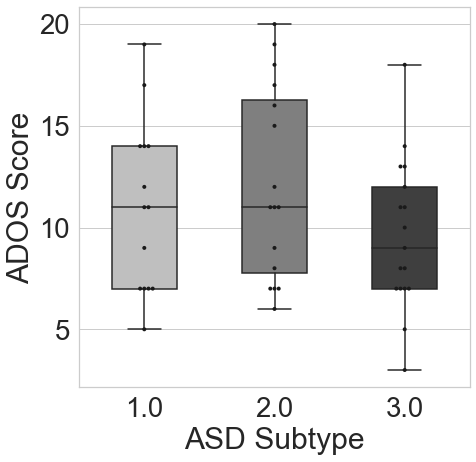

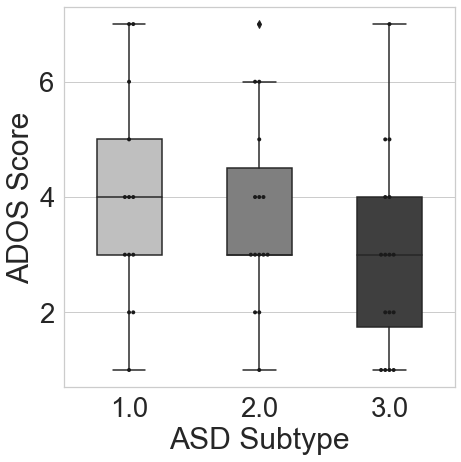

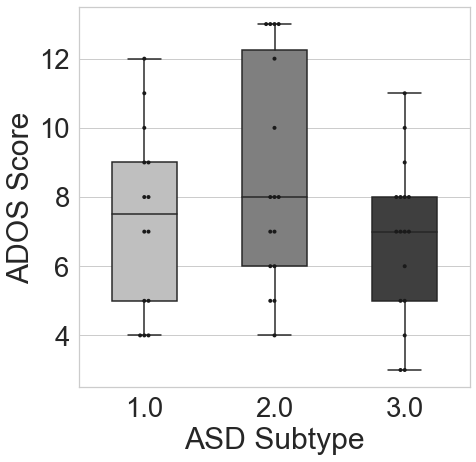

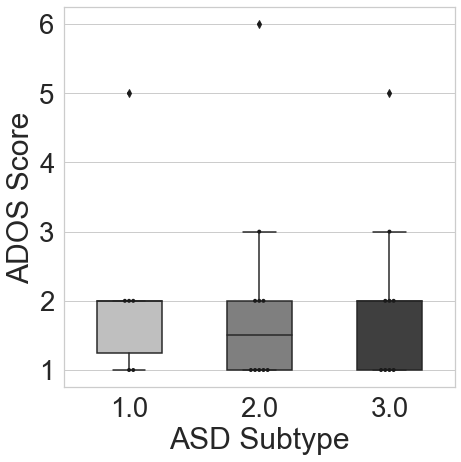

In [216]:
import seaborn as sns

FRF_subtype_label = np.zeros(len(ASD_index))
FRF_subtype_label[:] = np.nan
FRF_subtype_label[idx1] =2
FRF_subtype_label[idx2] =3
FRF_subtype_label[idx3] =1

FRF_subtype_label

# y = ADOS_social_sorted # ADOS_Total_sorted ADOS_comm_sorted ADOS_social_sorted ADOS_behav_sorted

for y in [ADOS_Total_sorted, ADOS_comm_sorted, ADOS_social_sorted, ADOS_behav_sorted]:

    df = DataFrame([y[:len(ASD_index)][y[:len(ASD_index)]>0], FRF_subtype_label[[y[:len(ASD_index)]>0]]]) 
    df = df.T
    df.columns = ['ADOS Score','ASD Subtype']

    plt.figure(figsize = (7,7))
    sns.set(style = 'whitegrid', font_scale=2.5)
    sns.boxplot(x = 'ASD Subtype' , y = df.columns[0], data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(x = 'ASD Subtype' , y = df.columns[0], data = df, color = 'k', size = 4)


C:\Users\woowon\.conda\envs\gudtls17_py36\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


<AxesSubplot:xlabel='ASD Subtype', ylabel='ADOS Total Calibration'>

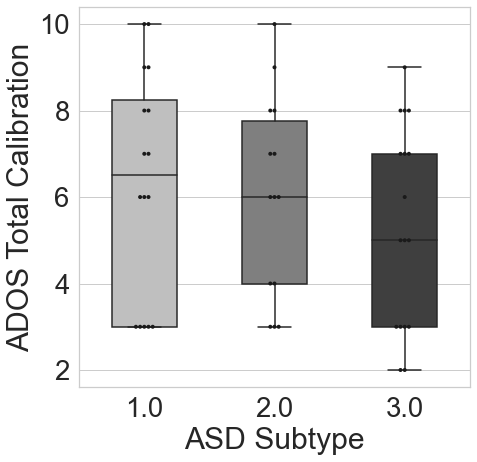

In [20]:
# ADOS Calibration score

demo_cali = pd.read_excel(join(path_data, 'abide_abideII_calibration.xlsx'), sheet_name='n=103', skiprows=0)

FileID_cali = demo_cali['ID']
ADOS_Total_cali = demo_cali['ADOS_T_CSS']

score = []
for i in sub_list:
    score.append(ADOS_Total_cali[np.where(FileID_cali == i)[0][0]])
    
score = np.array(score)

y = score[ASD_index]

df = DataFrame([y[:len(ASD_index)][y[:len(ASD_index)]>0], FRF_subtype_label[[y[:len(ASD_index)]>0]]]) # cluster_labels[ADOS_Total_idx_sorted] SRS_exist_idx_sorted
df = df.T
df.columns = ['ADOS Total Calibration','ASD Subtype']

plt.figure(1,(7,7))
sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(x = 'ASD Subtype' , y = df.columns[0], data = df, palette = 'gist_yarg', width=0.5)
sns.swarmplot(x = 'ASD Subtype' , y = df.columns[0], data = df, color = 'k', size = 4)

In [245]:
ADOS_Total_sorted[:len(ASD_index)][ADOS_Total_sorted[:len(ASD_index)]>0]

array([11., 17.,  9.,  9.,  7., 17.,  3.,  8., 11.,  5., 11.,  8., 12.,
        6., 11., 19.,  7., 13., 11., 14.,  8., 10., 13.,  9., 11., 14.,
       12.,  7.,  7.,  7.,  7., 14., 14.,  7., 20., 18.,  7.,  7., 12.,
       16.,  7., 15.,  5., 19., 11., 18.,  7.])

In [248]:
# save ABD2 symptom severity score

ABD2_Score = DataFrame([ADOS_Total_sorted[:len(ASD_index)], ADOS_comm_sorted[:len(ASD_index)], ADOS_social_sorted[:len(ASD_index)], ADOS_behav_sorted[:len(ASD_index)], FRF_subtype_label[:len(ASD_index)]]).T
ABD2_Score.columns = ['ADOS Total','ADOS Communication','ADOS Social','ADOS Behavior', 'ASD Subtype']
ABD2_Score
# ABD2_Score.to_excel(join(path_data,'ABD2_Score_ver2.xlsx', sheet_name = 'Sheet1', header = True)

# Compare symptom severity between discovery and replication

In [251]:
ABD1_Score = pd.read_excel(join(path_data, 'ABD1_Score.xlsx'), sheet_name='Sheet1', skiprows=0)
ABD2_Score = pd.read_excel(join(path_data, 'ABD2_Score.xlsx'), sheet_name='Sheet1', skiprows=0)

ABD1_Score['Dataset'] = 'Discovery'
ABD2_Score['Dataset'] = 'Replication'

@@ ADOS Total @@
p value :  0.1338
ABIDE 1 score :  12.78  +-  3.94
ABIDE 2 score :  11.0  +-  4.22
 
p value :  0.62
ABIDE 1 score :  12.84  +-  3.73
ABIDE 2 score :  12.12  +-  4.75
 
p value :  0.8228
ABIDE 1 score :  9.89  +-  1.9
ABIDE 2 score :  9.59  +-  3.71
 
[11.   12.12  9.59]
[12.78 12.84  9.89]

Chi Square
0.296
0.862
 
@@ ADOS Communication @@
p value :  0.2811
ABIDE 1 score :  4.44  +-  1.5
ABIDE 2 score :  3.92  +-  1.89
 
p value :  0.3027
ABIDE 1 score :  4.26  +-  1.28
ABIDE 2 score :  3.73  +-  1.67
 
p value :  0.7984
ABIDE 1 score :  3.11  +-  1.36
ABIDE 2 score :  2.94  +-  1.73
 
[3.92 3.73 2.94]
[4.44 4.26 3.11]

Chi Square
0.136
0.934
 
@@ ADOS Social @@
p value :  0.2067
ABIDE 1 score :  8.4  +-  2.82
ABIDE 2 score :  7.36  +-  2.68
 
p value :  0.9642
ABIDE 1 score :  8.58  +-  2.78
ABIDE 2 score :  8.62  +-  3.24
 
p value :  0.9567
ABIDE 1 score :  6.78  +-  1.39
ABIDE 2 score :  6.82  +-  2.27
 
[7.36 8.62 6.82]
[8.4  8.58 6.78]

Chi Square
0.131
0.937
 


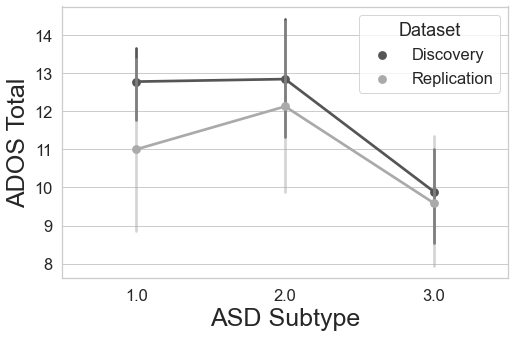

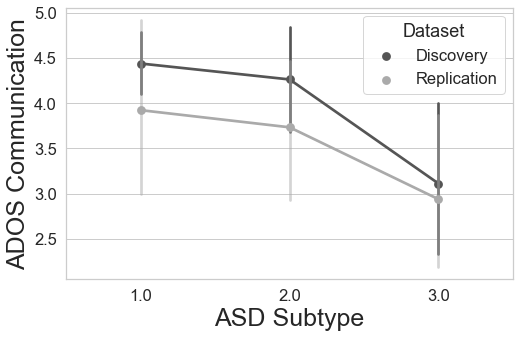

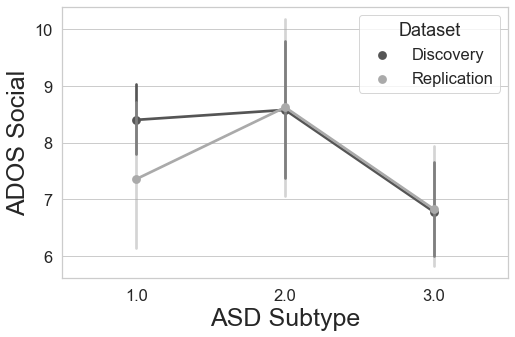

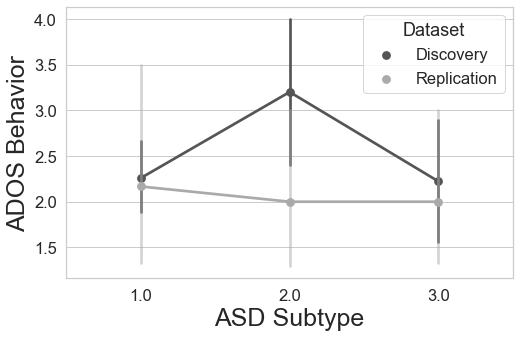

In [252]:
for score_name in ['ADOS Total','ADOS Communication','ADOS Social','ADOS Behavior']:
    
    print(f'@@ {score_name} @@')

    df_ABD1 = DataFrame([ABD1_Score[score_name], ABD1_Score['ASD Subtype'], ABD1_Score['Dataset']]).T
    df_ABD2 = DataFrame([ABD2_Score[score_name], ABD2_Score['ASD Subtype'], ABD2_Score['Dataset']]).T

    df_ABD12 = pd.concat([df_ABD1, df_ABD2], axis=0)

    df_plot = df_ABD12[df_ABD12[score_name]>0]

    plt.figure(figsize=(8,5))
    sns.set(style = 'whitegrid', font_scale=1.5)
    g = sns.pointplot(x = 'ASD Subtype' , y = score_name, hue = 'Dataset', data = df_plot,  palette = "gray", plot_kws=dict(alpha=1))
    plt.xlabel('ASD Subtype', fontsize = 25)
    plt.ylabel(score_name, fontsize = 25)
    # plt.ylim([0,8])
    # plt.yticks([0,2,4,6])
    plt.setp(g.collections, alpha = 1)
    plt.setp(g.lines[5:8], alpha=.5)  
    # sns.swarmplot(x = 'ASD Subtype' , y = 'ADOS Communication', data = df_plot, color = '.25')

    is_ABD1 = df_plot['Dataset'] == 'Discovery'
    is_ABD2 = df_plot['Dataset'] == 'Replication'
    is_sub1 = df_plot['ASD Subtype'] == 1
    is_sub2 = df_plot['ASD Subtype'] == 2
    is_sub3 = df_plot['ASD Subtype'] == 3

    chi_ob=[]
    chi_expect=[]

    for num in [is_sub1, is_sub2, is_sub3]:
        print('p value : ',np.round(sc.stats.ttest_ind(df_plot[num & is_ABD1][score_name],df_plot[num & is_ABD2][score_name])[1], 4))
        print('ABIDE 1 score : ',np.round(df_plot[num & is_ABD1][score_name].mean(),2),' +- ', np.round(df_plot[num & is_ABD1][score_name].std(),2))
        print('ABIDE 2 score : ',np.round(df_plot[num & is_ABD2][score_name].mean(),2),' +- ', np.round(df_plot[num & is_ABD2][score_name].std(),2))
        print(' ')
        chi_expect.append(df_plot[num & is_ABD1][score_name].mean())
        chi_ob.append(df_plot[num & is_ABD2][score_name].mean())

    # Chi square test between ABD1 and ABD2
    print(np.round(chi_ob,2))
    print(np.round(chi_expect,2))
    print('')
    print('Chi Square')
    print(np.round(sc.stats.chisquare(chi_ob, f_exp=chi_expect, axis=None, ddof = 0).statistic,3))
    print(np.round(sc.stats.chisquare(chi_ob, f_exp=chi_expect, axis=None, ddof = 0).pvalue,3))
    print(' ')

# Statistical analysis

In [202]:
#ttest
def subtype_ranksum(a,b):
    import statsmodels as sm
    from statsmodels.stats.multitest import multipletests
    
    input_a = a # [X, Y, Z, X, X, Y, W]
    input_b = b # [S, S, S, Y, Z, Z, R]

    s_1 = []
    p_1 = []

    for col in range(input_a.shape[1]):
        [s,p] = sc.stats.ranksums(input_a[:,col],input_b[:,col])
        s_1.append(s)
        p_1.append(p)
    
#     [s_1,p_1] = sc.stats.ttest_ind(input_a, input_b, axis=0, equal_var=False)
    
    s_1 = np.array(s_1)
    p_1 = np.array(p_1)

    # Calculate Effect size r
    effect_r = s_1/np.sqrt(len(input_a)+len(input_b))

    p_1_fdr_05 = sm.stats.multitest.multipletests(p_1,alpha=0.05,method='fdr_bh')
    p_1_fdr_01 = sm.stats.multitest.multipletests(p_1,alpha=0.01,method='fdr_bh')
    p_1_fdr_001 = sm.stats.multitest.multipletests(p_1,alpha=0.001,method='fdr_bh')

    print('FDR uncorrected : ', np.where(p_1 <=0.05)[0], np.where(p_1 <=0.05)[0].shape )
    print('')
    print(np.where(p_1_fdr_05[0]==True),'\n', np.where(p_1_fdr_05[0]==True)[0].shape)
    print('FDR 0.05 : ', p_1_fdr_05[1][np.where(p_1_fdr_05[0]==True)[0]])
    print('')
    print(np.where(p_1_fdr_01[0]==True),'\n', np.where(p_1_fdr_01[0]==True)[0].shape)
    print('FDR 0.01 : ', p_1_fdr_01[1][np.where(p_1_fdr_01[0]==True)[0]])
    print('')
    print(np.where(p_1_fdr_001[0]==True),'\n', np.where(p_1_fdr_001[0]==True)[0].shape)
    print('FDR 0.001 : ', p_1_fdr_001[1][np.where(p_1_fdr_001[0]==True)[0]])

    sign_idx = np.where(p_1_fdr_05[0]==True)[0]
    sign_idx_uncorr = np.where(p_1 <=0.05)[0]
    
    ttest_tval = np.zeros(360)
    input_idx = sign_idx_uncorr 
    ttest_tval[input_idx] = effect_r[input_idx] 
       
    return ttest_tval, sign_idx_uncorr

# Prepare visualization

def ROI_visualization(input_stat,stats = 'Ttest'):

    import vtk
    from vtk import vtkPolyDataNormals
    from brainspace.mesh.mesh_io import read_surface
    from brainspace.mesh.mesh_operations import combine_surfaces
    from brainspace.utils.parcellation import reduce_by_labels
    from brainspace.vtk_interface import wrap_vtk, serial_connect

    template_path = join(atlas_path,"MMP")
    template_L = "L.very_inflated_MSMAll.10k_fs_LR.surf.gii" # S900.L.midthickness_MSMAll.10k_fs_LR.surf.gii # L.very_inflated_MSMAll.10k_fs_LR.surf.gii
    template_R = "R.very_inflated_MSMAll.10k_fs_LR.surf.gii" # S900.R.midthickness_MSMAll.10k_fs_LR.surf.gii # R.very_inflated_MSMAll.10k_fs_LR.surf.gii

    surfs = [None] * 2
    # surf_type = 'very inflate' # 만들어달라고 하기 왜냐하면 midthickness로 보면 auditory능 유의한 영역이 잘 안보인다.
    surfs[0] = read_surface(join(template_path,template_L)) # Z:/hschoi/backup/hschoi/template/MMP/S900.L.midthickness_MSMAll.10k_fs_LR.surf.gii
    nf = wrap_vtk(vtkPolyDataNormals, splitting=False, featureAngle=0.1)
    surf_lh = serial_connect(surfs[0], nf)

    surfs[1] = read_surface(join(template_path,template_R)) # Z:/hschoi/backup/hschoi/template/MMP/S900.R.midthickness_MSMAll.10k_fs_LR.surf.gii
    nf = wrap_vtk(vtkPolyDataNormals, splitting=False, featureAngle=0.1)
    surf_rh = serial_connect(surfs[1], nf)

    # Visualization

    from brainspace.datasets import load_group_fc, load_parcellation, load_conte69
    from brainspace.gradient import GradientMaps
    from brainspace.plotting import plot_hemispheres
    from brainspace.utils.parcellation import map_to_labels

    atlas = np.load(join(template_path,"MMP.10k_fs_LR.npy"))


    #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ labeling scale이 246을 초과하면 에러나고, 인덱스가 64984를 넘으면 shape이 달라 에러남
    labeling = atlas #load_parcellation('schaefer', scale=300, join=True) # total_label # load_parcellation('schaefer', scale=300, join=True)
    #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

    conn_matrix = input_stat 

    mask = labeling != 0

    grad = map_to_labels(conn_matrix, labeling, mask=mask, fill=np.nan) # fill = np.nan fill = 0

    if stats == 'ANOVA':
        plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(1300, 300),
                         color_bar=True, cmap='Reds_r', zoom=1.25, nan_color=(0,0,0,1) ,color_range = (0,0.5)   ) #'jet' # 'viridis_r', 'Blues', 'Reds', 'seismic' # color_range = (-0.1,0.16) # color_range = (-13,13) nan_color=(0.8,0.8,0.8,1)
                                                                                                                         # view = None 'dorsal' 'ventral'
    elif stats == 'Ttest':
        plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(1300, 300),
                         color_bar=True, cmap='seismic', zoom=1.25, nan_color=(0,0,0,1) ,color_range = (-1,1)  , view = 'dorsal' ) #'jet' # 'viridis_r', 'Blues', 'Reds', 'seismic' # color_range = (-0.1,0.16) # color_range = (-13,13) nan_color=(0.8,0.8,0.8,1)
                                                                                                                     # view = None 'dorsal' 'ventral'

In [203]:
# ttest
X = ASD_DMN_pc_sub3 
Y = ASD_DMN_pc_sub1 
Z = ASD_DMN_pc_sub2
W = TD_DMN_pc_sub1
R = TD_DMN_pc_sub2 

S = np.concatenate((W,R))
U = np.concatenate((X,Y,Z))

print('T-test')
effect_r_ASD1_TD, ASD1_TD_idx = subtype_ranksum(X,S)
effect_r_ASD2_TD, ASD2_TD_idx = subtype_ranksum(Y,S)
effect_r_ASD3_TD, ASD3_TD_idx = subtype_ranksum(Z,S)
# effect_r_ASD12, ASD12_idx = subtype_ranksum(X,Y)
# effect_r_ASD13, ASD13_idx = subtype_ranksum(X,Z)
# effect_r_ASD23, ASD23_idx = subtype_ranksum(Y,Z)
# effect_r_TD12, TD12_idx = subtype_ranksum(W,R)

# print('')
# print('ANOVA')
# ANOVA_eta = subtype_kruskal(X,Y,Z)

T-test
FDR uncorrected :  [  4   5   6  15  16  17  18  20  21  26  33  34  46  48  50  51  55  60
  63  69  95 116 126 137 145 146 149 151 158 161 162 179 189 195 196 197
 198 200 201 205 213 221 225 226 227 228 246 263 301 306 314 322 325 331
 333 334 339 342] (58,)

(array([17], dtype=int64),) 
 (1,)
FDR 0.05 :  [0.01335866]

(array([], dtype=int64),) 
 (0,)
FDR 0.01 :  []

(array([], dtype=int64),) 
 (0,)
FDR 0.001 :  []
FDR uncorrected :  [  1   2  17  22  25  31  97 111 131 135 136 138 139 140 142 158 162 189
 197 202 207 240 244 259 267 268 272 291 306 308 314 316 318 319 342 343
 344 349] (38,)

(array([ 17, 197, 318], dtype=int64),) 
 (3,)
FDR 0.05 :  [0.01215845 0.01215845 0.006013  ]

(array([318], dtype=int64),) 
 (1,)
FDR 0.01 :  [0.006013]

(array([], dtype=int64),) 
 (0,)
FDR 0.001 :  []
FDR uncorrected :  [ 10  15  16  17  20  21  22  79 117 127 135 137 139 145 195 297 299 307
 308 311 316 317 318 319 320 323 328 335] (28,)

(array([], dtype=int64),) 
 (0,)
FDR 0.05 :  

# ROI Visulaization

In [207]:
# ROI_visualization(ANOVA_eta, stats = 'ANOVA')
ROI_visualization(effect_r_ASD3_TD, stats = 'Ttest')

# Make file for Neurosynth

In [95]:
def file_for_Neurosynth(input_stats, subtype_name = 'ASD1'):

    atlas = np.load(join(template_path,"MMP.10k_fs_LR.npy"))

    atlas_L = atlas[:10242]
    atlas_R = atlas[10242:]
    # 이거 L R 나눠서 gii로 만들고 wb_command 넣으면 됨

    # atlas.max()

    atlas_sig=np.zeros(len(atlas))
    for i in input_stats:                       # ASD12_idx ASD13_idx ASD23_idx ASD1_TD12_idx ASD2_TD12_idx ASD3_TD12_idx
        print(i+1, ' ', end='', flush=True)

        atlas_sig[np.where(atlas==i+1)[0]] = cohens_d[i]

    atlas_sig_L = atlas_sig[:10242]
    atlas_sig_R = atlas_sig[10242:]

    np.save(join(path_gii_data,f'L.MMP.10k.ef_r_{subtype_name}_TD_ABD2.npy'),atlas_sig_L) # atlas
    np.save(join(path_gii_data,f'R.MMP.10k.ef_r_{subtype_name}_TD_ABD2.npy'),atlas_sig_R)

In [ ]:
file_for_Neurosynth(ASD1_ranksum_idx, subtype_name = 'ASD1')
file_for_Neurosynth(ASD2_ranksum_idx, subtype_name = 'ASD2')
file_for_Neurosynth(ASD3_ranksum_idx, subtype_name = 'ASD3')